## Import necessary modules

In [18]:
import matplotlib.pyplot as plt

import octopus.dataset
from octopus.experiments.experiment import trace_elm
from octopus.preprocessing import kernel_builder, compute_grad_image
from octopus.visualization import plotting

In [19]:
from importlib import reload
reload(octopus.dataset)

<module 'octopus.dataset' from '/Users/uzaykaradag/Developer/octopus/octopus/dataset.py'>

## Load the test dataset

In [25]:
scans, base, gt = octopus.dataset.load_dataset()

In [26]:
idx = list(scans.keys())

## Pick test index and get respective scan, groundtruth ELM, SegNet/Base ELM 

In [38]:
test_idx = idx[300]
test_scan = scans[test_idx]
test_gt = gt[test_idx]
test_base = base[test_idx]

In [39]:
test_idx

'057-7'

## Compute the gradient image for octopus

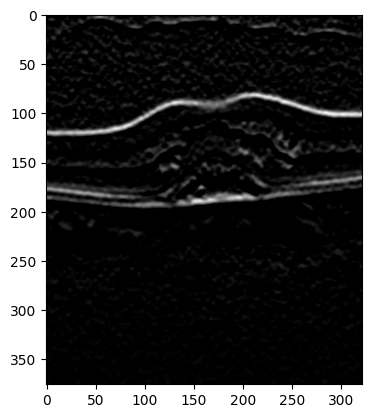

In [40]:
kernel = kernel_builder([11, 5])
test_grad = compute_grad_image(test_scan, kernel)
plt.imshow(test_grad, cmap='gray')

## Run OCTOPUS

In [41]:
import time

In [42]:
start = time.time()
pred = trace_elm(test_grad, test_base, discontinuity_threshold=25, num_runs=100)
t = time.time() - start
print(t)

73.42909789085388


## Plot results

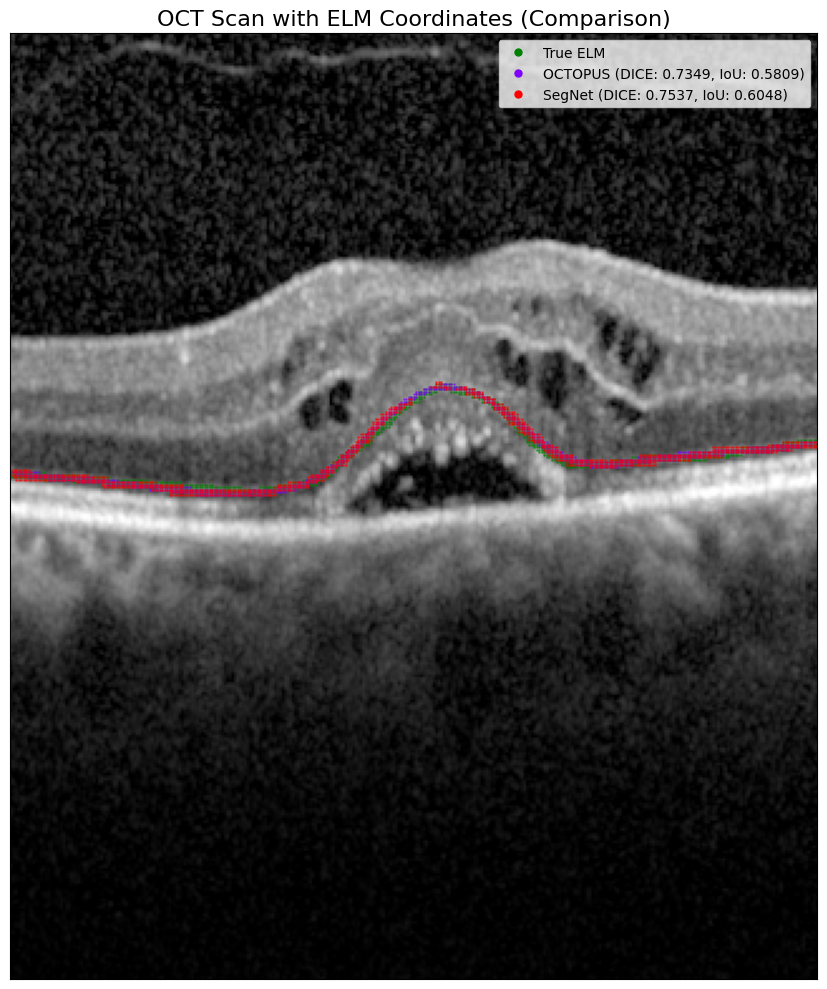

In [43]:
fig = plotting.display_scan(test_scan, {'OCTOPUS': pred, 'SegNet': test_base}, gt_elm=test_gt)

In [45]:
gp_params = {
    "kernel_options": {
        "kernel": "ExpSineSquared",
        "sigma_f": 1.0,
        "length_scale": 2.5,
        "alpha": 2.0,
    },
    "delta_x": 8,
    "score_thresh": 0.5,
    "n_samples": 1000,
    "seed": 1,
    "noise_y": 0.5,
    "keep_ratio": 0.1,
    "pixel_thresh": 5,
    "fix_endpoints": True,
    "return_std": True,
}

start = time.time()
pred_expsine = trace_elm(test_grad, test_base, discontinuity_threshold=25, num_runs=100, gp_params=gp_params)
t = time.time() - start
print(t)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may fin

74.12312388420105


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


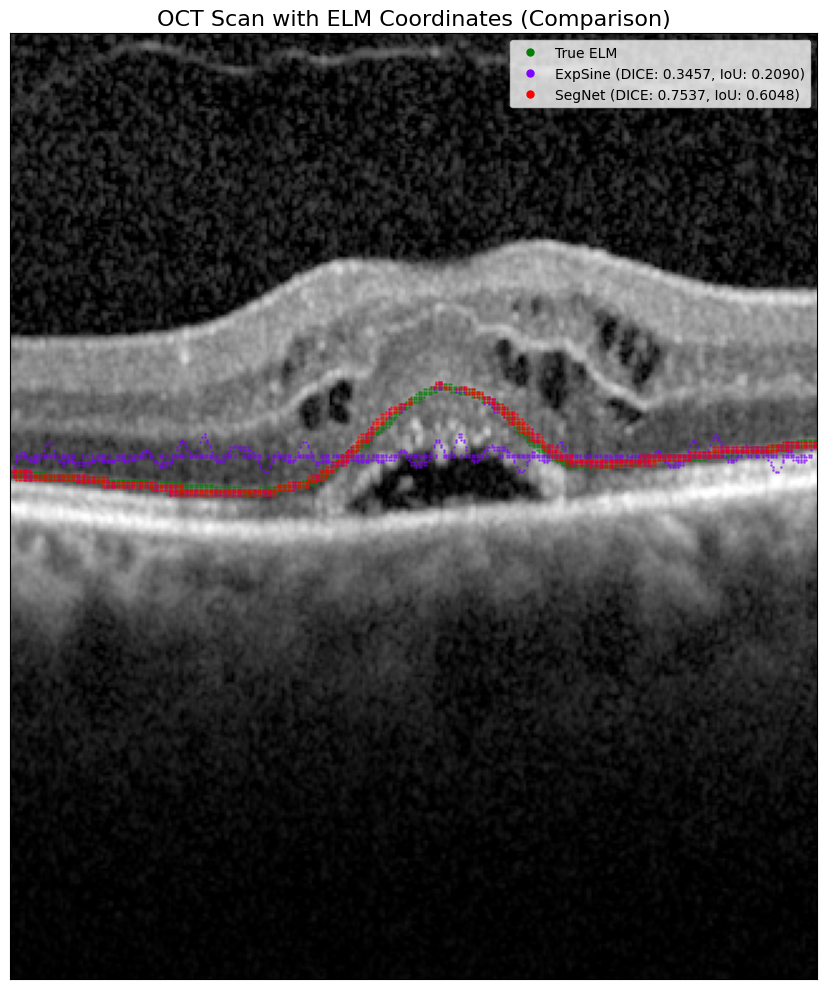

In [46]:
fig = plotting.display_scan(test_scan, {'ExpSine': pred_expsine, 'SegNet': test_base}, gt_elm=test_gt)